# Train ParticleNet-like LightningModule

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import yaml

import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pytorch_lightning import Trainer
from pytorch_lightning import LightningModule
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import seaborn as sns

sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from architectures.EquivariantGNN.Models.particlenet import ParticleNet

## Load model

In [4]:
with open("configs/pn_config.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [5]:
model = ParticleNet(hparams)

## Examine Dataset

In [15]:
def calc_kinematics(x, y, z):
    pt = np.sqrt(x**2 + y**2)
    theta = np.arctan2(pt, z)
    eta = -1. * np.log(np.tan(theta / 2.))
    phi = np.arctan2(y, x)
    
    return pt, eta, phi

In [16]:
model.setup(stage="fit")

In [17]:
sample = model.trainset[1]

In [18]:
e_mask = sample.x[:, 0] > 0
E, x, y, z = sample.x[e_mask].T
pt, eta, phi = calc_kinematics(x,y,z)

In [19]:
jet = sample.x.sum(0)

In [20]:
jet_pt, jet_eta, jet_phi = calc_kinematics(jet[1], jet[2], jet[3])

In [21]:
jet_pt, jet_eta, jet_phi

(tensor(646.8301, dtype=torch.float64),
 tensor(-0.1892, dtype=torch.float64),
 tensor(-0.1090, dtype=torch.float64))

In [22]:
delta_eta, delta_phi = eta - jet_eta, phi - jet_phi

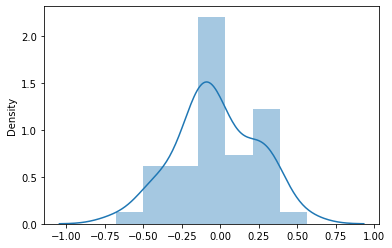

In [23]:
sns.distplot(delta_eta)

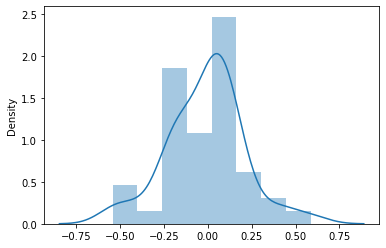

In [24]:
sns.distplot(delta_phi)

In [25]:
features = ["log_pt", "delta_eta", "x"]

In [26]:
cat_features = torch.cat([sample[feature].unsqueeze(1) if len(sample[feature].shape)==1 else sample[feature] for feature in features], dim=-1)

In [27]:
cat_features.shape

torch.Size([46, 6])

## Train

In [6]:
logger = WandbLogger(project="ParticleNet", group="InitialTest")
trainer = Trainer(gpus=1, max_epochs=hparams["n_epochs"], logger=logger)
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Set SLURM handle signals.

  | Name             | Type       | Params
------------------------------------------------
0 | node_encoder     | Sequential | 8.8 K 
1 | edge_convs       | ModuleList | 258 K 
2 | graph_classifier | Sequential | 115 K 
------------------------------------------------
382 K     Trainable params
0         Non-trainable params
382 K     Total params
1.532     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:103: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f'The dataloader, {name}, does not have many workers which may be a bottleneck.'
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:103: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f'The dataloader, {name}, does not have many workers which may be a bottleneck.'


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: LightningDeprecationWarning: Relying on `self.log('val_loss', ...)` to set the ModelCheckpoint monitor is deprecated in v1.2 and will be removed in v1.4. Please, create your own `mc = ModelCheckpoint(monitor='your_monitor')` and use it as `Trainer(callbacks=[mc])`.
  "Relying on `self.log('val_loss', ...)` to set the ModelCheckpoint monitor is deprecated in v1.2"


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

## Validate